# Neural & Behavioral Modeling - Week 5 (Exercises)
by 楊士寬 (r06521535@ntu.edu.tw)

In [86]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Drifit Diffusion Model (5 points)

Use whatever analytical methods to check if Tren's super EZ implementation(s) of the drift diffusion model produce exGaussian data, especially the exponential long tail. Remember to play around with different model parameters to see how they affect simulation results.

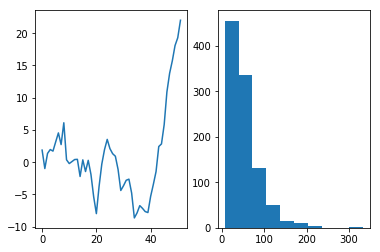

In [54]:
# Tren's implementation

from numpy import *

mu,sigma=0.2,2 # Diffusion type1
p=0.4 # Diffusion type2
Yend=20 # Threshold for response
Ntrial=1000

RTs=zeros(Ntrial)
for i in range(Ntrial):
    Y=0 # initial drift position
    Ys=[] # drift history
    RT=0 # Reset watch
    while(Y<Yend):
        dY=mu+random.normal(mu,sigma); # type1
        #dY=float((random.rand(1)-p)>0); # type2
        Y=Y+dY
        Ys.append(Y); # Diffusion history in each trial
        RT=RT+1 # clock is running
    RTs[i]=RT;
subplot(1,2,1);plot(Ys) # plot only the last trial to see the diffusion process
subplot(1,2,2);hist(RTs);

### Write your analysis or code here

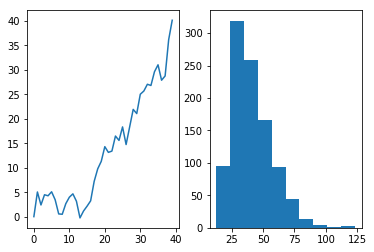

In [87]:
from numpy import *

mu,sigma=0.5,2.5 # Diffusion type1
p=0.4 # Diffusion type2
Yend=40 # Threshold for response
Ntrial=1000

RTs=zeros(Ntrial)
for i in range(Ntrial):
    Y=0 # initial drift position
    Ys=[] # drift history
    RT=0 # Reset watch
    while(Y<Yend):
        dY=mu+random.normal(mu,sigma); # type1
        #dY=float((random.rand(1)-p)>0); # type2
        Y=Y+dY
        Ys.append(Y); # Diffusion history in each trial
        RT=RT+1 # clock is running
    RTs[i]=RT;
subplot(1,2,1);plot(Ys) # plot only the last trial to see the diffusion process
subplot(1,2,2);hist(RTs);
#print (RTs)

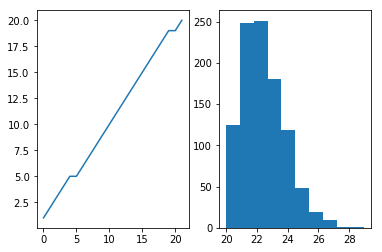

In [89]:
from numpy import *

mu,sigma=0.01,0.5 # Diffusion type1
p=0.1 # Diffusion type2
Yend=20 # Threshold for response
Ntrial=1000

RTs=zeros(Ntrial)
for i in range(Ntrial):
    Y=0 # initial drift position
    Ys=[] # drift history
    RT=0 # Reset watch
    while(Y<Yend):
        #dY=mu+random.normal(mu,sigma); # type1
        dY=float((random.rand(1)-p)>0); # type2
        Y=Y+dY
        Ys.append(Y); # Diffusion history in each trial
        RT=RT+1 # clock is running
    RTs[i]=RT;
subplot(1,2,1);plot(Ys) # plot only the last trial to see the diffusion process
subplot(1,2,2);hist(RTs);

## 2 Choose ONE of the following tasks (5 points):

(1) Port EZdata.m from Matlab to Python

(2) Port dataEz.m from Matlab to Python

(3) Provide an intuitive explanation about the form of exGuassian's probability density function (PDF).

<font color="grey">(Mathemaitcal derivation of that PDF may help you to figure out what's going on but please try to explain the whole thing in plain English.)</font>

In [92]:
from math import *

#  [Pc,VRT,MRT] = EZdata(0.1,0.14,0.300)
#  -->  Pc = 0.802    VRT = 0.112    MRT = 0.723

def EZdata(v,a,Ter):
    s = 0.1    
    s2 = s**2
    
    y = -v*a/s2
    Pc = 1.0/(1+exp(y))
    
    exp_y = exp(y)
    VRT = (2.0 * y * exp_y - exp(2.0 * y) + 1)/(exp_y+1)**2
    VRT = VRT * (a * s2 /(2.0* v **3))

    MDT = (1-exp_y)/(1+exp_y)
    MDT = MDT * (a/(2*v))

    MRT = MDT + Ter # Equation 8
       
    return Pc, VRT, MRT
Pc,VRT,MRT = EZdata(0.1,0.14,0.300)
print (Pc,VRT,MRT)

0.8021838885585817 0.11203504489060973 0.7230574439820145
